In [3]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [5]:
#Read in data
alz = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz.rds") 
alz_m = subset_samples(alz, Sex=="M")
alz_f = subset_samples(alz, Sex="F")


#### Unweighted UniFrac

In [6]:
#Both Sexes
alz.dist.unif = distance(alz, method = "unifrac", type = "samples")
alz.dist.unif.log = ordinate(alz, method = "PCoA", distance = "unifrac")
alz.dist.unif.evals = alz.dist.unif.log$values$Eigenvalues
#Male
alz.m.dist.unif = distance(alz_m, method = "unifrac", type = "samples")
alz.m.dist.unif.log = ordinate(alz_m, method = "PCoA", distance = "unifrac")
alz.m.dist.unif.evals = alz.m.dist.unif.log$values$Eigenvalues
#Female
alz.f.dist.unif = distance(alz_f, method = "unifrac", type = "samples")
alz.f.dist.unif.log = ordinate(alz_f, method = "PCoA", distance = "unifrac")
alz.f.dist.unif.evals = alz.f.dist.unif.log$values$Eigenvalues

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACAGAGGTCTCAAGCGTTGTTCGGATTCATTGGGCGTAAAGGGTGCGTAGGTGGCGGGGCAAGTTTGGTGTGAAATCCCGGGGCTCAACCCCGGAACTGCACTGAATACTGCTTTGCTAGAGTACTGGAGAGGGAACTGGAATTTACGG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTATGGGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGTGCGTAGGTGGTGGCTTAAGCGCAGGGTTTAAGGCAATGGCTTAACTATCGTTGGCCTTGCGAACTGGGTCACTTGAGTACAGGAGAGGAAAGCGGAATTCCTAGT -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGAGCGAGCGTTGTCCGGAATGACTGGGTGTAAAGGGAGCGTAGGCGGGATGGCAAGTCAGATGTGAAAACTATGGGCTTAACCCATAAACTGCATTTGAAACTGTGGTTCTTGAGTGAAGTAGAGGTAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGGAGGGGGCTAGCGTTGTTCGGAAATACTGGGCGTAAAGCGCACGTAGGCGGCGCAGCAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAA

png 
  2

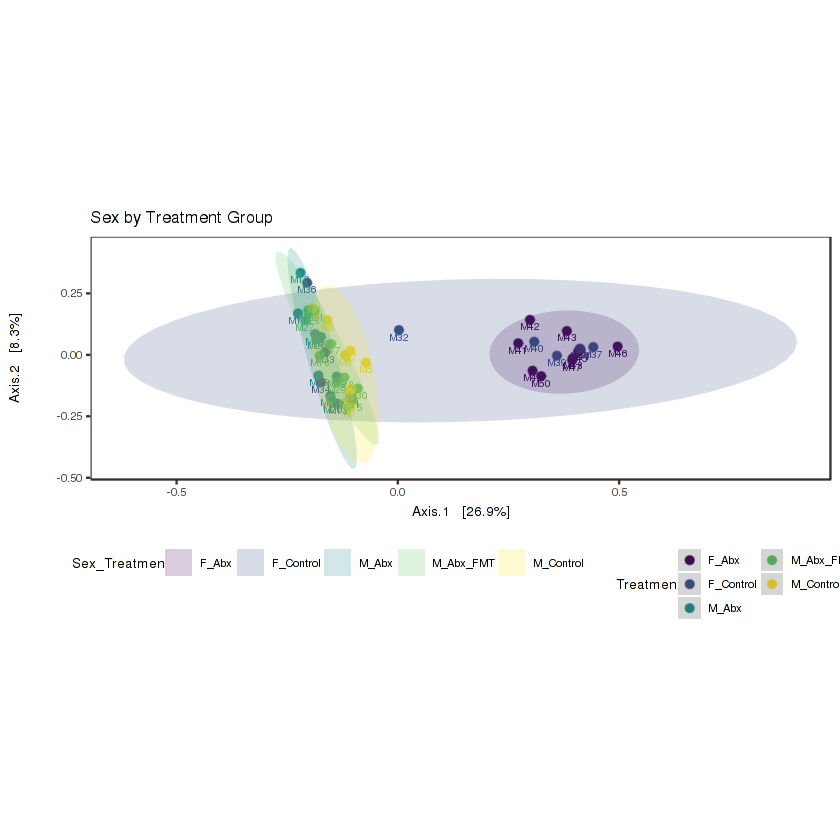

In [16]:
library(viridis)
p = plot_ordination(alz_f, alz.f.dist.unif.log, color = "Sex_Treatment", label="X.SampleID") + 
    ggtitle("Sex by Treatment Group") +
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Sex_Treatment), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(alz.f.dist.unif.evals[2] / alz.f.dist.unif.evals[1]))

p = p + guides(colour = guide_legend(title = "Treatment", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

png('sex_f_by_treatment.unif.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

### Weighted UniFrac

In [8]:
#Both Sexes
alz.dist.wunif = distance(alz, method = "wunifrac", type = "samples")
alz.dist.wunif.log = ordinate(alz, method = "PCoA", distance = "wunifrac")
alz.dist.wunif.evals = alz.dist.wunif.log$values$Eigenvalues
#Male
alz.m.dist.wunif = distance(alz_m, method = "wunifrac", type = "samples")
alz.m.dist.wunif.log = ordinate(alz_m, method = "PCoA", distance = "wunifrac")
alz.m.dist.wunif.evals = alz.m.dist.wunif.log$values$Eigenvalues
#Female
alz.f.dist.wunif = distance(alz_f, method = "wunifrac", type = "samples")
alz.f.dist.wunif.log = ordinate(alz_f, method = "PCoA", distance = "wunifrac")
alz.f.dist.wunif.evals = alz.f.dist.wunif.log$values$Eigenvalues

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGAGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGTGCGTAGGCGGCTTTGCGAGTCAGATGTGAAATCTATGGGCTCAACCCATAAACTGCATTTGAAACTGTAGAGCTTGAGTGAAGTAGAGGCAGGCGGAATTCCCCG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTGGGGGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTGCGTAGGTGGTAATTTAAGCGCAAGGTTTAAACTAACGGCTCAACCGTTAATTGCCATGCGAACTGGGTTACTTGAGTGCTGGAGGGGAAAGCGGAATTCCTAGT -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGCCATTCAAGTCGGGGGTGAAAGCCCAGGGCTCAACCCTGGAATTGCCTTCGATACTGTTTGGCTAGAGACCGGAAGAGGTTAGTGGAACTGCGAG -- in the phylogenetic tree in the data you provided.”Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- GACGGGGGGGGCAAGTGTTCTTCGGAATG

png 
  2

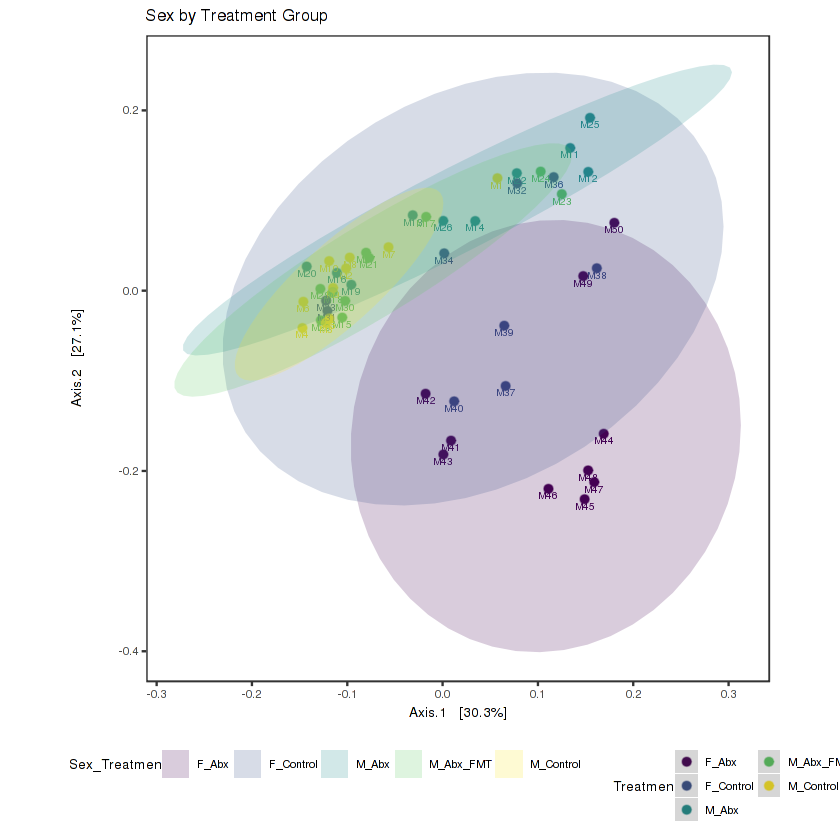

In [11]:
library(viridis)
p = plot_ordination(alz, alz.dist.wunif.log, color = "Sex_Treatment", label="X.SampleID") + 
    ggtitle("Sex by Treatment Group") +
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Sex_Treatment), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(alz.dist.wunif.evals[2] / alz.dist.wunif.evals[1]))

p = p + guides(colour = guide_legend(title = "Treatment", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

png('sex_by_treatment.wunif.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

In [12]:
#Both Sexes
alz.dist.bc = distance(alz, method = "bray", type = "samples")
alz.dist.bc.log = ordinate(alz, method = "PCoA", distance = "bray")
alz.dist.bc.evals = alz.dist.bc.log$values$Eigenvalues
#Male
alz.m.dist.bc = distance(alz_m, method = "bray", type = "samples")
alz.m.dist.bc.log = ordinate(alz_m, method = "PCoA", distance = "bray")
alz.m.dist.bc.evals = alz.m.dist.bc.log$values$Eigenvalues
#Female
alz.f.dist.bc = distance(alz_f, method = "bray", type = "samples")
alz.f.dist.bc.log = ordinate(alz_f, method = "PCoA", distance = "bray")
alz.f.dist.bc.evals = alz.f.dist.bc.log$values$Eigenvalues

png 
  2

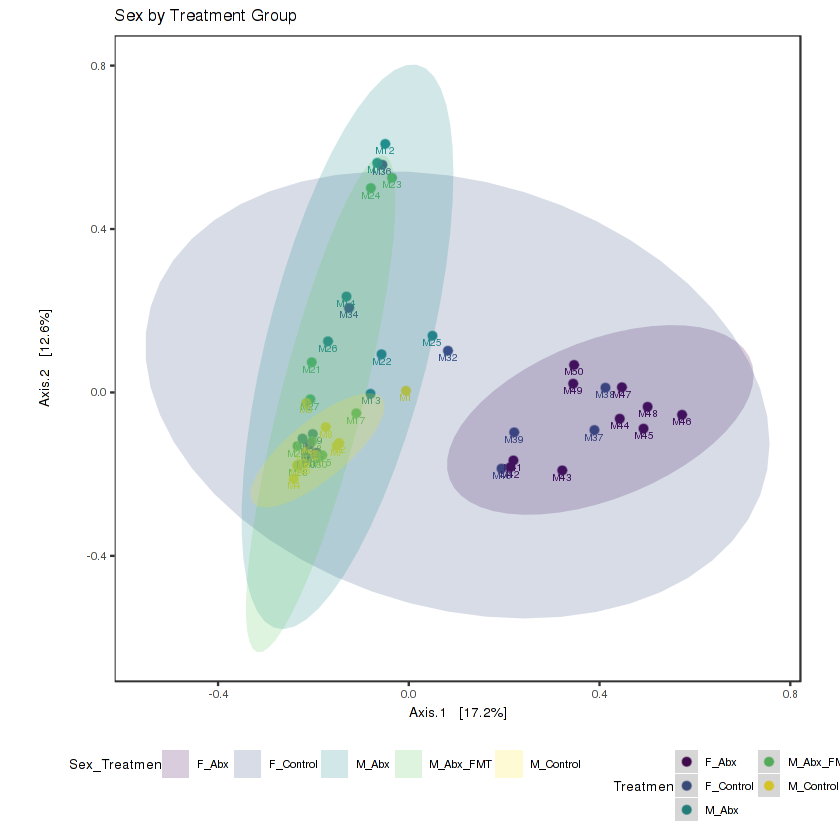

In [14]:
library(viridis)
p = plot_ordination(alz, alz.dist.bc.log, color = "Sex_Treatment", label="X.SampleID") + 
    ggtitle("Sex by Treatment Group") +
    geom_point(size=2, alpha=0.4) + 
    scale_colour_viridis(option="viridis", discrete=TRUE, direction=1) +
    stat_ellipse(level=0.95, geom="polygon",alpha = .2, aes(fill = Sex_Treatment), linetype=0) +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)+
    coord_fixed(sqrt(alz.dist.bc.evals[2] / alz.dist.bc.evals[1]))

p = p + guides(colour = guide_legend(title = "Treatment", ncol = 2, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=8, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.ticks = element_blank(),
              #legend.key.size = unit(.1, "in"),
              #legend.spacing.x = unit(.01,"in"),
              legend.position = "bottom")


p

png('sex_by_treatment.bc.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()